In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import time
import re
import matplotlib

In [2]:
import matplotlib.pyplot as plt
#from jieba import cut
#from wordcloud import WordCloud
from collections import Counter

In [3]:
url = 'https://www.ptt.cc/bbs/Gossiping/index.html'
headers = {'user_agent': 'Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/79.0.3945.130 Safari/537.36'}
cookies = {'over18': '1'}
res_pages = 5

In [4]:
def update_sublink_attr(link, ip, loc, txt):
    res = requests.get(link, headers=headers, cookies=cookies)
    res.encoding = 'utf-8'
    soup = BeautifulSoup(res.text, 'html.parser')

    txt.append(soup.find(id="main-content").text.replace('\n', '').replace('\r', '').strip())
    f = 0
    for x in soup.find_all('div'):
        if f != 0:
            break
        for i in x.find_all(class_="f2"):
            if '來自: ' in str(i):
                ip.append(str(i).split('來自: ')[1].split(' (')[0])
                loc.append(str(i).split(' (')[1].split(')')[0])
                f += 1
                break

In [5]:
def update_table(soup, title, author, date, link, ip, loc, txt):
    for s in soup.find_all(class_="r-ent"):
        try:
            title.append(s.find(class_="title").text.replace('\t', '').replace('\n', ''))
            author.append(s.find(class_="author").text)
            date.append(s.find(class_="date").text.strip())
            
            sublink = 'https://www.ptt.cc' + s.find(class_="title").a['href']
            link.append(sublink)
            print(".", end="")
            
            update_sublink_attr(sublink, ip, loc, txt)
            time.sleep(0.5)
        except:
            no = len(title)
            title[-1] = []
            
            if len(author) == no:
                author[-1] = []
            
            if len(date) == no:
                date[-1] = []

            if len(link) == no:
                link[-1] = []
            
            if len(ip) == no:
                ip[-1] = []
            
            if len(loc) == no:
                loc[-1] = []

            if len(txt) == no:
                txt[-1] = []
            
            print("(", no, ")", end="")
            continue

In [6]:
def update_soup(url, cycle):
    title  = []
    author = []
    date   = []
    link   = []
    ip     = []
    loc    = []
    txt    = []

    headers = {'user_agent': 'Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/79.0.3945.130 Safari/537.36'}
    cookies = {'over18': '1'}

    for i in range(cycle):
        res = requests.get(url, headers=headers, cookies=cookies)
        res.encoding = 'utf-8'
        soup = BeautifulSoup(res.text, 'html.parser')
        print(i, url, end="")
        btn = soup.find(class_="btn-group btn-group-paging").find_all('a')[1]['href']
        url = 'https://www.ptt.cc' + btn
        print(" <", end="")
        update_table(soup, title, author, date, link, ip, loc, txt)
        time.sleep(0.5)
        print(">")
        
    table = {'title': title, 'author': author, 'date':date, 'ip':ip, 'loc':loc, 'text':txt, 'link':link}
    return table

In [7]:
table = {}
table = update_soup(url, res_pages)

0 https://www.ptt.cc/bbs/Gossiping/index.html <........................>
1 https://www.ptt.cc/bbs/Gossiping/index39070.html <....................>
2 https://www.ptt.cc/bbs/Gossiping/index39069.html <....................>
3 https://www.ptt.cc/bbs/Gossiping/index39068.html <....................>
4 https://www.ptt.cc/bbs/Gossiping/index39067.html <....................>


In [8]:
print('Title\t',  len(table['title']),  table['title'][0])
print('Author\t', len(table['author']), table['author'][0])
print('Date\t',   len(table['date']),   table['date'][0])
print('Link\t',   len(table['link']),   table['link'][0])
print('IP\t',     len(table['ip']),     table['ip'][0])
print('Loc\t',    len(table['loc']),    table['loc'][0])
print('Text\t',   len(table['text']),   table['text'][0])

Title	 104 [問卦] 被Billie Eilish踩坐有多爽
Author	 104 guohuo
Date	 104 2/25
Link	 104 https://www.ptt.cc/bbs/Gossiping/M.1582562034.A.106.html
IP	 104 114.45.102.159
Loc	 104 臺灣
Text	 104 作者guohuo (帕羅奧圖馬克祖克伯)看板Gossiping標題[問卦] 被Billie Eilish踩坐有多爽時間Tue Feb 25 00:33:52 2020躺著被Billie Eilish穿鞋子踩https://i.imgur.com/uixxexw.jpghttps://i.imgur.com/dS5jWFI.jpg被Billie Eilish坐在身上 還要做伏地挺身https://i.imgur.com/VyWaVrA.jpghttps://i.imgur.com/eKsY2OC.jpg那個男的是不是很爽很幸運能被Billie Eilish踩坐是不是很爽有沒有八卦?--※ 發信站: 批踢踢實業坊(ptt.cc), 來自: 114.45.102.159 (臺灣)※ 文章網址: https://www.ptt.cc/bbs/Gossiping/M.1582562034.A.106.html→ dlam002: 誰？     39.8.98.15 02/25 00:34噓 qaz123505: 看起來像男的 101.12.244.254 02/25 00:34→ pyrolith: 黑寡婦180.217.225.109 02/25 00:34推 heavenlyken: 五樓肛門被甲甲穿釘鞋踩   114.39.4.168 02/25 00:35推 nolimitamy19: bad guy180.217.160.255 02/25 00:35噓 luke11130177: http://i.imgur.com/EDXaxrt.jpg111.249.106.200 02/25 00:35噓 viable: 全殘欸男的幻想世界不用公開發表吧 101.137.22.211 02/25 00:35噓 f17690815: 會直接被這肥婆壓死吧  27.52.105.124 02/25 00:35→ logi

In [9]:
df = pd.DataFrame(table)
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 7 columns):
title     104 non-null object
author    104 non-null object
date      104 non-null object
ip        104 non-null object
loc       104 non-null object
text      104 non-null object
link      104 non-null object
dtypes: object(7)
memory usage: 5.8+ KB


,title,author,date,ip,loc,text,link
0,[問卦] 被Billie Eilish踩坐有多爽,guohuo,2/25,114.45.102.159,臺灣,作者guohuo (帕羅奧圖馬克祖克伯)看板Gossiping標題[問卦] 被Billie ...,https://www.ptt.cc/bbs/Gossiping/M.1582562034....
1,Re: [問卦] 吞了30顆安眠藥會怎樣,notmine,2/25,175.96.84.159,臺灣,作者notmine (just melancholy)看板Gossiping標題Re: [問...,https://www.ptt.cc/bbs/Gossiping/M.1582562093....
2,[問卦] 現在首抽台灣算什麼等級？,attilalin,2/25,111.251.156.170,臺灣,作者attilalin (噗噗)看板Gossiping標題[問卦] 現在首抽台灣算什麼等級？...,https://www.ptt.cc/bbs/Gossiping/M.1582562097....
3,[問卦] WHO最近怎麼沒新聞了?,EBVirus,2/25,111.253.66.19,臺灣,作者EBVirus (洨洨積極哥)看板Gossiping標題[問卦] WHO最近怎麼沒新聞了...,https://www.ptt.cc/bbs/Gossiping/M.1582562101....
4,[問卦] 怎麼樣婉轉地跟教授說窩不想做他交代的事,poeta,2/25,125.224.215.197,臺灣,作者poeta (鍵盤詩人)看板Gossiping標題[問卦] 怎麼樣婉轉地跟教授說窩不想做...,https://www.ptt.cc/bbs/Gossiping/M.1582562146....


In [10]:
df['loc'].count()

104

In [11]:
df['loc'].value_counts().keys()

Index(['臺灣', '美國', '日本'], dtype='object')

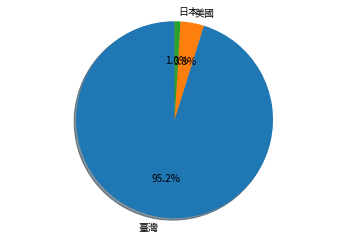

In [12]:
plt.rcParams['font.sans-serif'] = ['Noto Sans CJK JP']
plt.pie(df['loc'].value_counts(), labels=df['loc'].value_counts().keys(), autopct='%1.1f%%', shadow=True, startangle=90)
plt.axis('equal') 
plt.show()